# Deformación dinámica del tiempo

### Autora: Lucía Núñez Calvo

#### Fecha: 17 de Febrero de 2022

DTW es un algoritmo que se caracteriza por medir la similitud entre dos secuencias.
En este notebook se van a poner ejemplos de distintas bibliotecas que implementan DTW.
1.  DTW suite proporciona el paquete <font color='blue'>dtw-python</font> de Python 
2.  La bibliotecas <font color='blue'>mlpy, pydtw</font>
3.  La biblioteca <font color='blue'>simpledtw</font>
4.  La biblioteca <font color='blue'>tslearn</font>

Lo primero será crear unas series con las que trabajaremos a lo largo del proyecto. 

In [51]:
import numpy as np

serie1 = [0, 1, 2, 1, 4, 3, 3, 0]
serie2 = [0, 2, 4, 3, 1, 2, 4, 0]

timeseries = np.array([
    [0.0, 0, 1, 2, 1, 0, 1, 0, 0],
    [0.0, 1, 2, 0, 0, 0, 0, 0, 0],
    [0.0, 0, 1, 2, 1, 0, 0, 0, 0]])

serie1_2d = np.array([[0, 0], [0, 1], [2, 1], [0, 1], [0, 0]], dtype=np.double)
serie2_2d = np.array([[0, 0], [2, 1], [0, 1], [0, .5], [0, 0]], dtype=np.double)

serie1_4d = np.array([[0,0,0,0], [0,1,2,1], [2,0,1,1], [0,0,0,1], [0,1,2,0]], dtype=np.double)
serie2_4d = np.array([[0,0,0,0], [2,1,2,2], [0,2,2,1], [0,.5,1,1], [0,1,2,0]], dtype=np.double)

## 1. Paquete dtw-python

### 1.1 dtaidistance.dtw 

Esta es la implementación más completa sobre algoritmos de tipo DTW. En caso de no tener los paquetes instalados se deberá ejecutar la siguieten línea de código: <font color='blue'>pip install dtw-python</font>

1. <font color='blue'> warping_paths </font> Calcula la ruta de deformación entre dos secuencias
2. <font color='blue'> best_path </font> Calcula la ruta óptima. Los parámetros de fila y columna son opcionales pero si se especifican indicarán desde que fila o columna se ha de empezar 
3. <font color='blue'> distance </font> Obtiene únicamente la distancia entre ambas series, se le pueden añadir parámetros para hacer que se detenga en caso de encontrar un valor demasiado grande y tmabién se pueden aladir penalizaciones 
4. <font color='blue'> ub_euclidean </font> Retorna la distancia euclidea
5. <font color='blue'> warping_path_penalty </font> Calcula la ruta de deformación entre dos secuencias y admite hasta dos sanciones diferentes, la penalización tradicional de DTW y una segunda penalización 'penalty_post' que mide la cantidad de deformación
6. <font color='blue'> warping_paths_affinity </font> Devuelve la distancia y la matriz DTW utilizando una matriz de afinidad/similitud en lugar de una matriz de ditancias
7. <font color='blue'> distance_matrix, distance_matrix_fast </font> Devuelve la matriz de distancias para todas las secuencias que se le pasen como argumento

In [28]:
from dtaidistance import dtw

distance, paths = dtw.warping_paths(serie1, serie2) 
print('Distancia: ',distance)
np.set_printoptions(precision=3)
print(paths)

Distancia:  2.8284271247461903
[[0.      inf   inf   inf   inf   inf   inf   inf   inf]
 [  inf 0.    2.    4.472 5.385 5.477 5.831 7.071 7.071]
 [  inf 1.    1.    3.162 3.742 3.742 3.873 4.899 5.   ]
 [  inf 2.236 1.    2.236 2.449 2.646 2.646 3.317 3.873]
 [  inf 2.449 1.414 3.162 3.    2.449 2.646 4.    3.464]
 [  inf 4.69  2.449 1.414 1.732 3.464 3.162 2.646 4.796]
 [  inf 5.568 2.646 1.732 1.414 2.449 2.646 2.828 4.   ]
 [  inf 6.325 2.828 2.    1.414 2.449 2.646 2.828 4.123]
 [  inf 6.325 3.464 4.472 3.317 1.732 2.646 4.796 2.828]]


In [32]:
best_path = dtw.best_path(paths,row=3, col=3)
print('Ruta óptima a partir de la fila 3, columna 3: ',best_path)

Ruta óptima a partir de la fila 3, columna 3:  [(0, 0), (1, 1), (2, 2)]


In [33]:
euclidean_distance = dtw.ub_euclidean(serie1, serie2) 
print('La distancia euclídea es: ', euclidean_distance)

La distancia euclídea es:  4.47213595499958


In [35]:
#Sin penalización
distance, best_path, distance_between_2_elements, paths= dtw.warping_path_penalty(serie1,serie2,penalty_post=0)
print('Distancia: ',distance)
print('Ruta óptima: ',best_path)
print('Distancia DTW entre 2 elementos de la ruta: ',distance_between_2_elements)

Distancia:  2.8284271247461903
Ruta óptima:  [(0, 0), (1, 0), (2, 1), (3, 1), (4, 2), (5, 3), (5, 4), (5, 5), (6, 6), (7, 7)]
Distancia DTW entre 2 elementos de la ruta:  [1.0, 0.0, 0.41421356237309515, 0.0, 0.0, 1.0352761804100827, 0.19626156828141283, 0.18267581368159957, 0.0]


In [36]:
#Con penalización 
distance, best_path, distance_between_2_elements, paths= dtw.warping_path_penalty(serie1, serie2, penalty_post=2)
print('Distancia: ',distance)
print('Ruta óptima: ',best_path)
print('Distancia DTW entre 2 elementos de la ruta: ',distance_between_2_elements)

#Se observa que los caminos son los mismos, cambia la distancia, a más penalización, mayor valor 

Distancia:  10.82842712474619
Ruta óptima:  [(0, 0), (1, 0), (2, 1), (3, 1), (4, 2), (5, 3), (5, 4), (5, 5), (6, 6), (7, 7)]
Distancia DTW entre 2 elementos de la ruta:  [1.0, 0.0, 0.41421356237309515, 0.0, 0.0, 1.0352761804100827, 0.19626156828141283, 0.18267581368159957, 0.0]


In [37]:
distance, paths = dtw.warping_paths_affinity(serie1, serie2)
print('Distancia: ',distance)
np.set_printoptions(precision=3)
print(paths)

Distancia:  8.24403133461021
[[0.     -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [ -inf 1.    1.018 1.018 1.018 1.386 1.405 1.405 2.405]
 [ -inf 1.368 1.736 1.736 1.754 2.754 3.122 3.122 3.49 ]
 [ -inf 1.386 2.736 2.754 3.122 3.49  4.49  4.508 4.526]
 [ -inf 1.754 3.104 3.104 3.14  4.49  4.858 4.858 5.226]
 [ -inf 1.754 3.122 4.122 4.49  4.49  4.876 5.876 5.876]
 [ -inf 1.754 3.49  4.49  5.49  5.508 5.876 6.244 6.244]
 [ -inf 1.754 3.858 4.858 6.49  6.508 6.876 7.244 7.244]
 [ -inf 2.754 3.876 4.858 6.49  6.876 6.894 7.244 8.244]]


En la siguiente celda se va a calcular la matriz de distancias para todas las secuencias en timeseries. Los parámetros añadidos en la segunda línea son:
1. <font color='blue'> use_mp </font> Fuerza el uso de multiprocesamiento para operaciones paralelas
2. <font color='blue'> only_triu </font> Calcula únicamente la matriz triangular superior

In [43]:
paths1 = dtw.distance_matrix(timeseries)
paths2 = dtw.distance_matrix_fast(timeseries,use_mp=True,only_triu=True)
print('Matriz de distancias: ',paths1)
print('Matriz de distancias triangular superior: ',paths2)

Matriz de distancias:  [[0.    1.414 1.   ]
 [1.414 0.    1.   ]
 [1.    1.    0.   ]]
Matriz de distancias triangular superior:  [[  inf 1.414 1.   ]
 [  inf   inf 1.   ]
 [  inf   inf   inf]]


### 1.2 dtaidistance.dtw_ndim

Con este nuevo paquete lo que se va a lograr es compara series multidimensionales

In [50]:
from dtaidistance import dtw_ndim

distance = dtw_ndim.distance(serie1_2d, serie2_2d)
euclidean_distance = dtw_ndim.ub_euclidean(serie1_2d, serie2_2d)
print('Distancia: ',distance)
print('Distancia euclídea: ',euclidean_distance)

Distancia:  1.118033988749895
Distancia euclídea:  2.8722813232690143


In [52]:
distance = dtw_ndim.distance(serie1_4d, serie2_4d)
euclidean_distance = dtw_ndim.ub_euclidean(serie1_4d, serie2_4d)
print('Distancia: ',distance)
print('Distancia euclídea: ',euclidean_distance)

Distancia:  3.391164991562634
Distancia euclídea:  3.905124837953327


In [49]:
#Matriz de distancia para todas las secuencias n-dimensionales en timeseries.
dtw_ndim.distance_matrix(timeseries,3) #El argumento ndim es obligatorio

array([[0.   , 1.414, 1.   ],
       [1.414, 0.   , 1.   ],
       [1.   , 1.   , 0.   ]])

### 1.3 dtaidistance.dtw_visualisation

Con este paquete se van a poder visualizar los resultados obtenidos en los pasos anteriores.
1. <font color='blue'> plot_warping </font> Traza la deformación optima entre dos secuencias 

[(0, 0), (1, 0), (2, 1), (3, 1), (4, 2), (5, 3), (5, 4), (5, 5), (6, 6), (7, 7)]


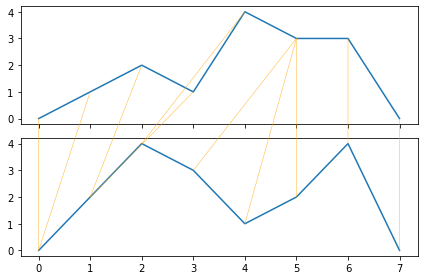

In [53]:
from dtaidistance import dtw_visualisation

path = dtw.warping_path(serie1, serie2)
dtw_visualisation.plot_warping(serie1, serie2, path)

print(path)

### 1.4 dtaidistance.ed

Calcula la distancia euclidiana entre dos secuencias, además soporta diferentes longitudes.

In [58]:
from dtaidistance import ed

s11=[0,1,2,3,3,4,5,6,1,3,4,0]
s22=[0,1,2,3,3,4,0]

ed.distance(s11, s22)

9.327379053088816

## 2. Paquetes mply pydtw

En caso de no tener los paquetes instalados se deberá ejecutar la siguieten línea de código: <font color='blue'>pip install pydtw</font>


In [69]:
from pydtw import dtw1d #Para series con una dimensión

serie1=np.array(serie1, dtype=np.double)
serie2=np.array(serie2, dtype=np.double)

cost_matrix, cost, alignmend_a, alignmend_b = dtw1d(serie1,serie2)
print('El coste es: ',cost)
print('Las alineaciones son:')
print(alignmend_a)
print(alignmend_b)

El coste es:  13.0
Las alineaciones son:
[0, 0, 1, 2, 3, 4, 4, 4, 5, 6]
[0, 0, 1, 1, 1, 2, 3, 4, 5, 6]


In [70]:
from pydtw import dtw2d #Para series con dos dimensiones

cost_matrix, cost, alignmend_a, alignmend_b = dtw2d(serie1_2d,serie2_2d)
print('El coste es: ',cost)
print('Las alineaciones son:')
print(alignmend_a)
print(alignmend_b)

El coste es:  inf
Las alineaciones son:
[0, 1, 2, 3, 3, 4]
[0, 0, 1, 2, 3, 4]


## 3. Biblioteca simpledtw

Para poder utilizar esta biblioteca se ha tenido que descargar un archivo <font color='blue'>simpledtw.py</font> y adjuntarlo en el directorio sobre el que se esta ejecutando este proyecto.


Esta biblioteca permite calcular la distancia DTW en series escalares o de vectores y depende de NumPy.

In [85]:
import simpledtw 

path, cost, mapping_1, mapping_2, matriz_costes = simpledtw.dtw(serie1, serie2)
print('La ruta es: ',matches)
print('El coste es: ',cost)
print(mapping_1)
print(mapping_2)
print('Matriz de costes: ',matriz_costes)

La ruta es:  [(0, 0), (1, 1), (2, 2), (2, 3), (3, 4), (3, 5), (4, 6), (5, 6), (6, 7)]
El coste es:  6.0
[[0], [1], [2, 3], [4, 5], [6], [6], [7]]
[[0], [1], [2], [2], [3], [3], [4, 5], [6]]
Matriz de costes:  [[ 0.  2.  6.  9. 10. 12. 16. 16.]
 [ 1.  1.  4.  6.  6.  7. 10. 11.]
 [ 3.  1.  3.  4.  5.  5.  7.  9.]
 [ 4.  2.  4.  5.  4.  5.  8.  8.]
 [ 8.  4.  2.  3.  6.  6.  5.  9.]
 [11.  5.  3.  2.  4.  5.  6.  8.]
 [11.  7.  7.  5.  3.  5.  9.  6.]]


Como se puede observar, el coste es el mayor encontrado en la ruta de costes, es decir, el último. Si nos fijamos en la matriz, los costes para cada parte del camino son los siguientes:
1. (0,0) coste 0
2. (1,1) coste 1
3. (2,2) coste 3
4. (2,3) coste 4
5. (3,4) coste 4
6. (3,5) coste 5
7. (4,6) coste 5
8. (5,6) coste 6
9. (6,7) coste 6 


(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

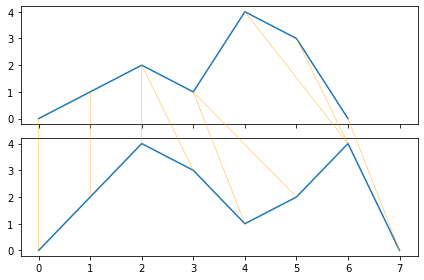

In [86]:
dtw_visualisation.plot_warping(serie1, serie2, path)

## 4. Biblioteca tslearn

En caso de no tener los paquetes instalados se deberá ejecutar la siguieten línea de código: <font color='blue'>pip install tslearn</font>.

1. <font color='blue'>dtw</font> Devuelve la distancia
    -  Con el parámetro <font color='blue'>sakoe_chiba_radius</font> se indica un radio, este número corresponderá con el número de elementos a considerar fuera de la diagonal 
    - Con el parámetro <font color='blue'>itakura_max_slope</font> se produce una restricción en forma de paralelogramo
2. <font color='blue'>dtw_path</font> Devuelve la distancias y la ruta óptima 
3. <font color='blue'>dtw_path_from_metric</font> Devuelve la ruta optima y el coste total
4. <font color='blue'>dtw_limited_warping_length</font> Establece un límite superior en la longitud de la trayectoria de deformación para descartar caminos complejos 
5. <font color='blue'>soft_dtw</font> Controla el suavizado de la media resultante.

In [91]:
from tslearn.metrics import dtw, dtw_path

distance=dtw(serie1, serie2)
print('La distancia es: ',distance)

La distancia es:  2.8284271247461903


In [96]:
optimal_path, distance = dtw_path(serie1, serie2)
print('La ruta óptima es: ',optimal_path)
print('La distancia es: ',distance)

La ruta óptima es:  [(0, 0), (1, 1), (2, 2), (2, 3), (3, 4), (3, 5), (4, 6), (5, 6), (6, 7)]
La distancia es:  2.8284271247461903


In [97]:
from tslearn.metrics import dtw_path_from_metric

optimal_path, cost = dtw_path_from_metric(serie1, serie2)
print('La ruta óptima es: ',optimal_path)
print('El coste total es: ',cost)

La ruta óptima es:  [(0, 0), (1, 1), (2, 2), (2, 3), (3, 4), (3, 5), (4, 6), (5, 6), (6, 7)]
El coste total es:  6.0


In [102]:
cost = dtw(serie1, serie2, global_constraint="sakoe_chiba", sakoe_chiba_radius=0.5)
print(cost)

3.3166247903554


In [14]:
cost = dtw(series_1, series_2, global_constraint="itakura", itakura_max_slope=2.)
print(cost)

1.7176146249959565


In [111]:
from tslearn.metrics import dtw_limited_warping_length

distance1 = dtw_limited_warping_length(serie1, serie2, 8)
print('Distancia con un límite superior de 8: ',distance1)

distance2 = dtw_limited_warping_length(serie1, serie2, 10)
print('Distancia con un límite superior de 10: ',distance2)

Distancia con un límite superior de 8:  3.3166247903554
Distancia con un límite superior de 10:  2.8284271247461903


In [118]:
from tslearn.metrics import soft_dtw

soft_dtw_score = soft_dtw(serie1, serie2, gamma=0.5)
print(soft_dtw_score)

6.983484831215426


### Bibliografía

Music Synchronization with Dynamic Time Warping: http://librosa.org/doc/main/auto_examples/plot_music_sync.html

Efficient pairwise DTW calculation using numpy or cython: https://stackoverflow.com/questions/44994866/efficient-pairwise-dtw-calculation-using-numpy-or-cython

TimeSeriesDTW: https://eclass.aueb.gr/modules/document/file.php/INF403/Code%26Data/TimeSeriesDTW.html

simpledtw: https://github.com/talcs/simpledtw

tslearn: https://tslearn.readthedocs.io/en/stable/user_guide/dtw.html#dtw

Dynamic Time Warping - example of the python module usage: https://github.com/halachkin/cdtw/blob/master/cdtw/examples.ipynb
